In [1]:
import scanpy as sc
import numpy as np

/home/batson/miniconda3/envs/mcv7/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [45]:
adata = sc.read('/mnt/ibm_lg/james/mcv_workspace/data/tabula_muris_senis/tabula-muris-senis-droplet-official-raw-obj.h5ad')

In [46]:
adata.obs['n_counts'] = adata.X.sum(1)

In [47]:
deep = adata[adata.obs['n_counts'] > 20000]

In [48]:
deep

View of AnnData object with n_obs × n_vars = 21175 × 20138 
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts'
    var: 'n_cells'

In [49]:
from collections import Counter
class_counts = Counter(deep.obs['cell_ontology_class'])

In [50]:
min_cells = 50
deep_classes = [c for c in class_counts if class_counts[c] > min_cells]

In [51]:
deep = deep[deep.obs['cell_ontology_class'].isin(deep_classes)]

In [52]:
from molecular_cross_validation.util import poisson_fit

In [53]:
var_genes_p = poisson_fit(np.array(deep.X.todense()))

In [54]:
import matplotlib.pyplot as plt

(array([10866.,   269.,   264.,   293.,   382.,   373.,   510.,   732.,
         1227.,  5222.]),
 array([-1.00000000e+01, -9.00000000e+00, -8.00000000e+00, -7.00000000e+00,
        -6.00000000e+00, -5.00000000e+00, -4.00000000e+00, -3.00000000e+00,
        -2.00000000e+00, -1.00000000e+00,  4.34294518e-11]),
 <a list of 10 Patch objects>)

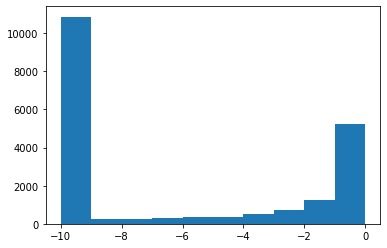

In [55]:
plt.hist(np.log10(var_genes + 1e-10))

In [56]:
deep = deep[:, var_genes_p < 1e-2]

In [57]:
deep

View of AnnData object with n_obs × n_vars = 20252 × 13689 
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts'
    var: 'n_cells'

In [58]:
deep = deep.copy()

In [60]:
deep.write('/mnt/ibm_lg/james/mcv_workspace/tabula-muris-senis-subset.h5ad')

In [26]:
deep.obsm['X_true'] = deep.X.copy()

In [27]:
counts_per_cell=3000
sc.pp.downsample_counts(deep, counts_per_cell=counts_per_cell)

In [28]:
deep

AnnData object with n_obs × n_vars = 20252 × 13689 
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts'
    var: 'n_cells'
    obsm: 'X_true'

In [31]:
deep.write('/mnt/ibm_lg/james/mcv_workspace/tabula-muris-senis-deep.h5ad')

In [32]:
import pickle

In [33]:
def densify(x):
    return np.array(x.todense())

In [34]:
deep.X = densify(deep.X)
deep.obsm['X_true'] = densify(deep.obsm['X_true'])

In [39]:
true_means = deep.obsm['X_true']/deep.obsm['X_true'].sum(1, keepdims = True)
true_counts = deep.obsm['X_true'].sum(1, keepdims = True)
umis = deep.X.astype(np.int)

In [40]:
with open('/mnt/ibm_lg/james/mcv_workspace/tabula-muris-senis-deep.pickle', 'wb') as out:
    pickle.dump((true_means, true_counts, umis), out)

In [63]:
python.__version__

NameError: name 'python' is not defined

In [64]:
import sys

In [65]:
sys.__version__

AttributeError: module 'sys' has no attribute '__version__'

In [68]:
sys.executable

'/home/batson/miniconda3/bin/python'

# Just a few cell types

In [2]:
adata = sc.read('/mnt/ibm_lg/james/mcv_workspace/data/tabula_muris_senis/tabula-muris-senis-deep.h5ad')

In [3]:
from collections import Counter
class_counts = Counter(adata.obs['cell_ontology_class'])

In [4]:
class_counts

Counter({'keratinocyte': 4631,
         'basal cell of epidermis': 2800,
         'promonocyte': 819,
         'granulocytopoietic cell': 637,
         'naive T cell': 1142,
         'hematopoietic precursor cell': 277,
         'macrophage': 968,
         'megakaryocyte-erythroid progenitor cell': 996,
         'late pro-B cell': 62,
         'erythroblast': 250,
         'luminal epithelial cell of mammary gland': 438,
         'T cell': 59,
         'B cell': 249,
         'endothelial cell': 63,
         'mesenchymal stem cell of adipose': 267,
         'myeloid cell': 409,
         'podocyte': 111,
         'kidney proximal convoluted tubule epithelial cell': 90,
         'kidney collecting duct principal cell': 78,
         'lymphocyte': 256,
         'hepatocyte': 287,
         'pancreatic PP cell': 95,
         'pancreatic B cell': 188,
         'epithelial cell': 51,
         'granulocyte': 159,
         'proerythroblast': 240,
         'thymocyte': 297,
         'bladder urot

In [14]:
Counter(adata[(adata.obs['tissue'] == 'Liver')].obs['cell_ontology_class'])

Counter({'B cell': 9, 'hepatocyte': 287, 'Kupffer cell': 811})

In [16]:
Counter(adata[(adata.obs['tissue'] == 'Liver')]

Counter({'B cell': 9, 'hepatocyte': 287, 'Kupffer cell': 811})

In [19]:
two_types = adata[adata.obs['cell_ontology_class'].isin(['hepatocyte', 'Kupffer cell'])]

In [21]:
two_types.write('/mnt/ibm_lg/james/mcv_workspace/data/tabula_muris_senis/liver_deep.h5ad')